In [1]:
using Pkg
Pkg.add("WebIO")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [51]:
using WebIO
using IJulia
include("GA.jl")
include("plottingUtils.jl")
include("roadNetwork.jl")

In [19]:
# boundary1(x) = 0
# boundary2(x) = 15
boundary1(x) = sin(x+12)+4
boundary2(x) = sin(x+4)+12
o1 = Circle(1,Point(5,10))
o2 = Circle(1.2,Point(10,7))
o3 = Circle(0.8,Point(7,6))
o4 = Circle(0.8,Point(12,8))
# o2 = Rectangle(3,2,Point(10,7))
start_point = Point(0,10)
goal_point = Point(19,5.2)

road = Road(boundary1,boundary2,[o1,o2,o3,o4])

LoadError: MethodError: no method matching Point(::Int64, ::Int64)

In [4]:
gr()

draw_road(road,0,20)

LoadError: UndefVarError: road not defined

In [5]:
circle = Circle(1,Point(5,10))
test_curve = BezierCurve([Point(2,9),Point(6,11)])
test_curve = BezierCurve([Point(0, 10), Point(9.792786584297819, 12.404595735445575), Point(19, 9)])

LoadError: MethodError: no method matching Point(::Int64, ::Int64)

In [6]:
plt = plot(get_circle(circle))
plot!(plt,get_curve(test_curve))

LoadError: UndefVarError: circle not defined

In [7]:
curve_values = get_curve(test_curve)
i = findall(x -> x==4,curve_values[1])
@show i
curve_values[2][i]

LoadError: UndefVarError: test_curve not defined

In [8]:
circle_values = get_circle(circle)
is = findall(x -> round(x,digits=2) == 4.00,circle_values[1])
# filter(x -> x<4.1,circle_values[1])

LoadError: UndefVarError: circle not defined

In [9]:
circ_intersects = []
for i in is
    if round(circle_values[2][i],digits=1) == curve_values[2][251]
        append!(circ_intersects,[i])
    end
end
circ_intersects

LoadError: UndefVarError: is not defined

In [10]:
intersects = []
for i in 1:length(curve_values[1])
    x = curve_values[1][i]
    y = curve_values[2][i]
    potential_intersect_circle_is = findall(cx -> round(cx,digits=1)==round(x,digits=1),circle_values[1])
    for j in potential_intersect_circle_is
        if round(y,digits=1) == round(circle_values[2][j],digits=1)
            append!(intersects,[(x,y)])
        end
    end
end
@show intersects

infeasbile_d = √((intersects[1][1]-intersects[end][1])^2 + (intersects[1][2] - intersects[end][2])^2)


LoadError: UndefVarError: curve_values not defined

In [11]:
include("GA.jl")
include("roadNetwork.jl")
include("plottingUtils.jl")
P = GA(start_point,goal_point,road,2);

LoadError: UndefVarError: start_point not defined

In [12]:
plotGeneration!(draw_road(road,0,20),P[1:4],road)

# map(i->isFeasible(road,i),P)

LoadError: UndefVarError: road not defined

In [13]:
map(i -> feasibilityCheck(road,i),P)
# feasibilityCheck(road,P[1])

LoadError: UndefVarError: P not defined

In [14]:
plt = plotGeneration(P)
o_vals = map(o -> get_circle(o), road.obstacles)


LoadError: UndefVarError: P not defined

In [15]:
function plotObstacles(road)
    plt = plot()
    for o in road.obstacles
        plot!(plt,get_circle(o), seriestype=[:shape],legend=false )
    end
    plt
end

plotObstacles (generic function with 1 method)

In [55]:
include("plottingUtils.jl")
# plt =plotObstacles(road)
# plotGeneration!(plt,P)

plot_control_points! (generic function with 1 method)

In [106]:
include("roadNetwork.jl")
include("utils.jl")

c = BezierCircle()
# x = BezierCurve([Point(0,1)])


4-element Array{Point,1}:
 Point(0, 1)
 Point(0.0, 1.7698003589195008)
 Point(0.16666666666666685, 1.250925583244189)
 Point(-0.4999999999999998, 0.8660254037844387)

In [61]:
circ = Circle(1,Point(0,0))

Circle(1, Point(0, 0))

In [67]:
circ(π)
# c(0.5)

(-1.0, 1.2246467991473532e-16)

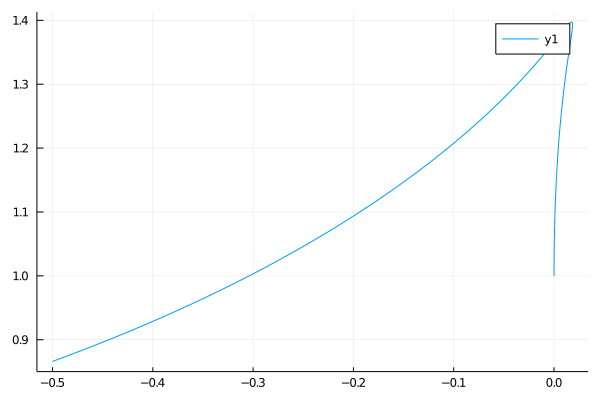

In [107]:
plot_curve(c,100)

In [84]:
get_curve(c)

(Any[0.0, 1.1983999999999999e-5, 4.7872e-5, 0.000107568, 0.00019097599999999998, 0.00029800000000000003, 0.000428544, 0.0005825120000000001, 0.0007598080000000001, 0.0009603359999999999  …  0.999039664, 0.9992401919999999, 0.9994174880000001, 0.999571456, 0.9997020000000001, 0.999809024, 0.999892432, 0.999952128, 0.999988016, 1.0], Any[1.0, 0.999988016, 0.999952128, 0.999892432, 0.9998090239999999, 0.999702, 0.999571456, 0.999417488, 0.9992401919999999, 0.999039664  …  0.0009603359999997654, 0.0007598079999997639, 0.0005825119999997629, 0.00042854399999976163, 0.00029799999999976037, 0.00019097599999975926, 0.00010756799999975817, 4.78719999997571e-5, 1.1983999999756067e-5, -2.4492935982947064e-16])